In [5]:
import numpy as np
%matplotlib inline
from datavyz.main import graph_env

(<Figure size 1013.54x572.598 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1950b5ee10>)

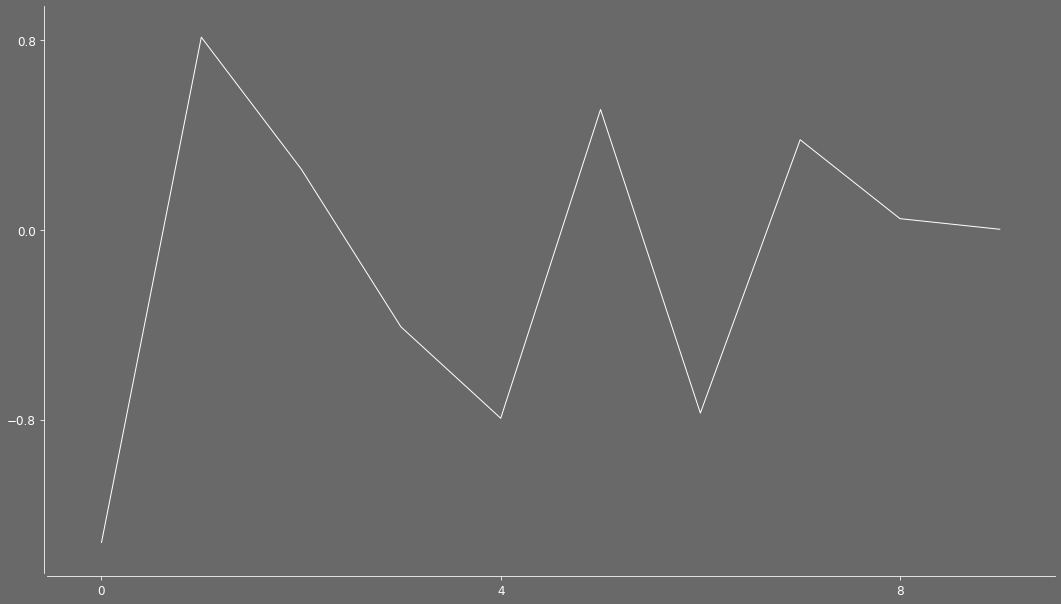

In [10]:
ge = graph_env('visual_stim')
ge.plot(np.random.randn(10))

# Visual setting

In [54]:
SCREEN = {'width':16./9.*8, # inches
          'height':8.,
          'dpi':20}
Xmax, Ymax = int(SCREEN['width']*SCREEN['dpi']), int(SCREEN['height']*SCREEN['dpi'])
x, y = np.meshgrid(1.0*np.arange(Xmax), 1.0*np.arange(Ymax))

def plot(Z,
         ax=None,
         x=x, y=y, 
         Ybar_label='',
         Xbar_label='10$^o$'):
    if ax is None:
        fig, ax = ge.figure()
    else:
        fig = None
    ge.twoD_plot(x.flatten(), y.flatten(), 1.-Z.flatten(),
                 vmin=0, vmax=1,
                 colormap=ge.binary,
                 ax=ax)
    ge.draw_bar_scales(ax, Xbar=10., Ybar_label=Ybar_label,
                       Ybar=10., Xbar_label=Xbar_label,
                       xyLoc=(-0.02*SCREEN['width'], 1.02*SCREEN['height']),
                       loc='left-top')
    ax.axis('equal')
    ax.axis('off')
    return fig, ax

# plot(y/y.max())

# Cells with gabor receptive fields

(<Figure size 1013.54x572.598 with 1 Axes>,
 None)

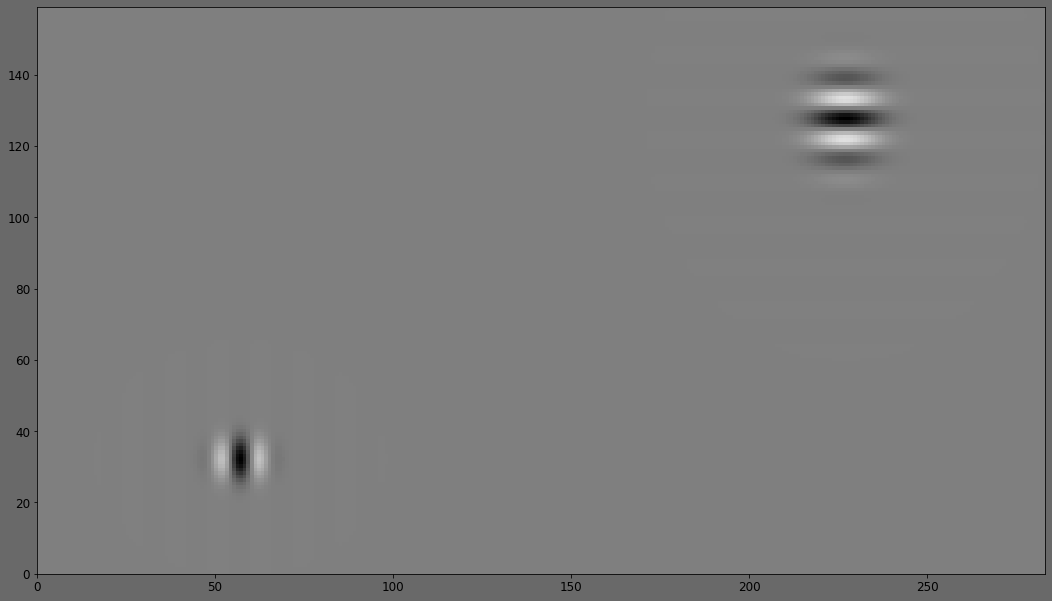

In [115]:
from gabor_filters import gabor


N=2 # picking 10 cells

RANGES = {'x0':[0.2*Xmax, 0.8*Xmax],
          'y0':[0.2*Ymax, 0.8*Ymax],
          'freq':[1./(0.05*Ymax), 1./(0.1*Ymax)],
          'size':[0.02*Ymax, 0.1*Ymax],
          'beta':[1., 2.],
          'theta':[0., np.pi/2.],
          'psi':[0., np.pi]}
RANGES = {'x0':[0.2*Xmax, 0.8*Xmax],
          'y0':[0.2*Ymax, 0.8*Ymax],
          'freq':np.ones(2)/(0.075*Ymax),
          'size':[0.03*Ymax, 0.05*Ymax],
          'beta':[1.5, 1.5],
          'theta':[0, np.pi/2.],
          'psi':[0., 0]}

CELLS = {}
for key in RANGES:
    # CELLS[key] = np.random.uniform(RANGES[key][0], RANGES[key][1], size=N)
    CELLS[key] = np.array([RANGES[key][0], RANGES[key][1]])

Z = 0*x

def cell_gabor(i,
               x=x, y=y, CELLS=CELLS):
    gb = gabor(x, y,
               x0=CELLS['x0'][i],
               y0=CELLS['y0'][i],
               freq=CELLS['freq'][i],
               size=CELLS['size'][i],
               beta=CELLS['beta'][i],
               theta=CELLS['theta'][i],
               psi=CELLS['psi'][i])
    return gb
    
    
for i in range(N):
    z = cell_gabor(i)+0.5
    Z += z/N
    
fig, ax = ge.figure()
ge.twoD_plot(x.flatten(), y.flatten(), Z.flatten(), vmin=0, vmax=1, colormap=ge.binary,
             ax=ax)


# Stimuli: 1) Drifting gratings

(<Figure size 831.685x572.598 with 2 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f194c48c390>)

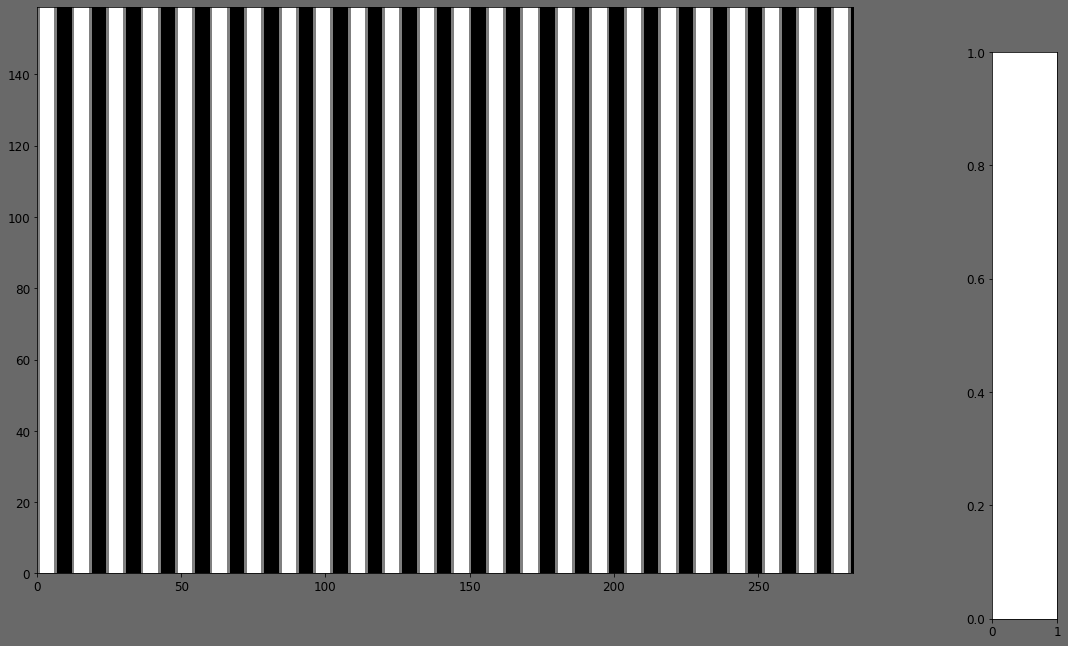

In [116]:
spatial_freq, theta = CELLS['freq'][0], CELLS['theta'][0]

# Centering and Rotation
x_theta = x * np.cos(theta) + y * np.sin(theta)
y_theta = -x * np.sin(theta) + y * np.cos(theta)


Z = np.sin(2*np.pi*spatial_freq*x_theta)+.5
        
ge.twoD_plot(x.flatten(), y.flatten(), 1.-Z.flatten(),
             vmin=0, vmax=1,
             colormap=ge.binary)


# Linear filtering

In [117]:
import itertools
def convolution_function(array1, array2):
    if array1.shape==array2.shape:
        tot = 0
        for i, j in itertools.product(range(array1.shape[0]), range(array1.shape[1])):
            tot += array1[i,j]*array2[i,j]
        return tot
    else:
        print('/!\ Shape of the two arrays need to match !')

(<Figure size 1013.54x572.598 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f194c3d90d0>)

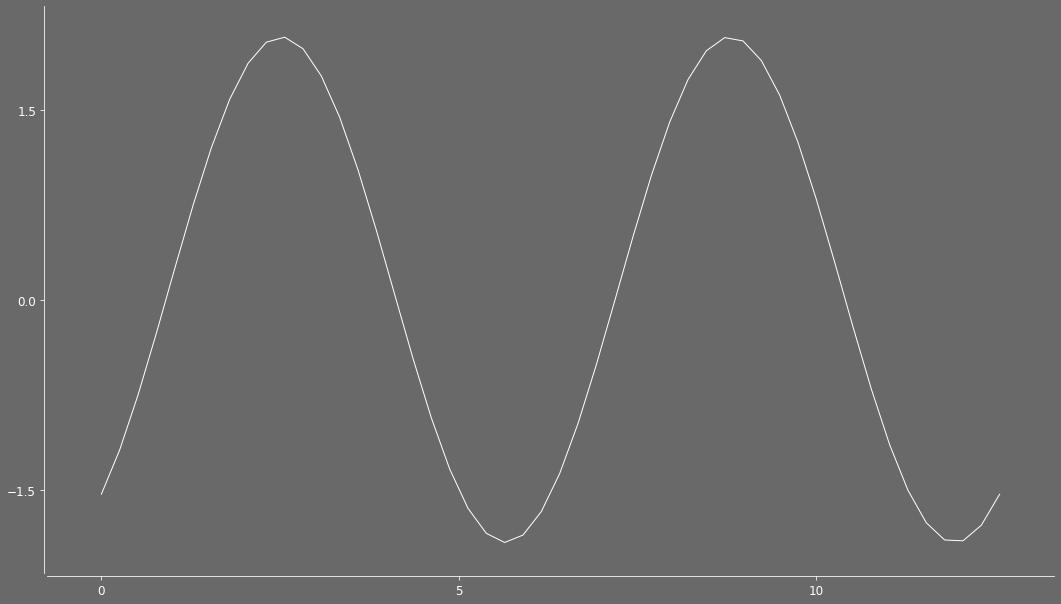

In [119]:
PHASES = np.linspace(0, 4*np.pi, 50)
LF = []

gb = cell_gabor(0)
norm = convolution_function(gb, gb)
gb_normed = gb/norm

for phase in PHASES:
    Z = np.sin(2*np.pi*spatial_freq*x_theta+phase)+.5
    LF.append(convolve2d(Z, gb_normed, mode='valid')[0][0])
    
ge.plot(PHASES, LF)

# Non-linear processing

(<Figure size 1013.54x572.598 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f193fe78890>)

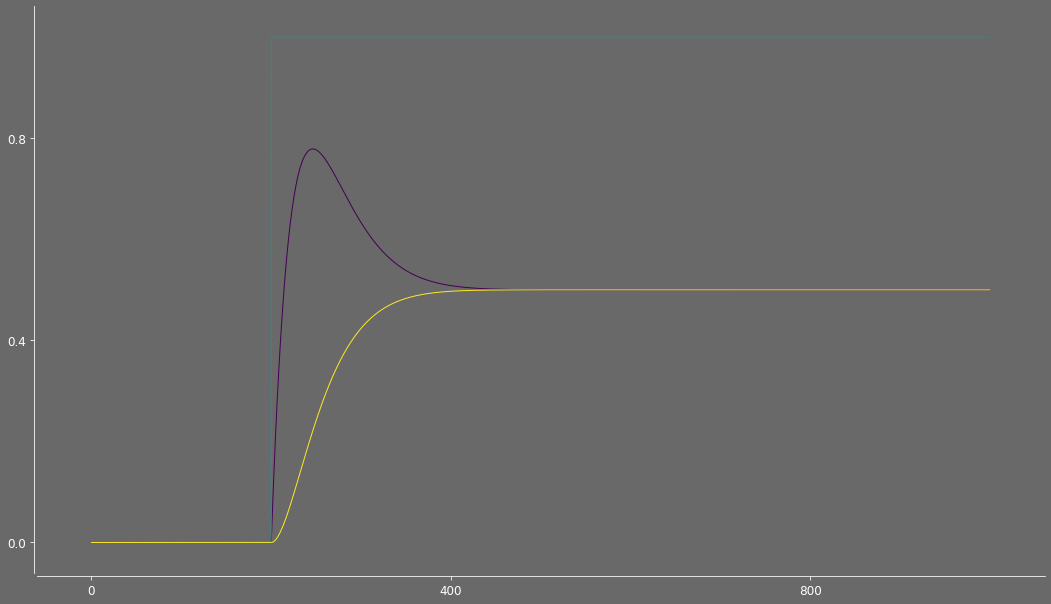

In [137]:

tstop, dt = 1000, 0.1
tau_delay, tau_adapt = 20, 100
fraction_adapt = 0.5

t = np.arange(int(tstop/dt))*dt

s = [1 if tt>2*tau_adapt else 0 for tt in t]

r = np.zeros(len(lf))
a = np.zeros(len(lf))

for i in range(1, len(t)-1):
    r[i+1] = r[i]+dt/tau_delay*(-r[i]+s[i]-a[i])
    a[i+1] = a[i]+dt/tau_adapt*(-a[i]+r[i])

ge.plot(t, Y=[r,s,a])

(<Figure size 831.685x572.598 with 2 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f1950a7e9d0>)

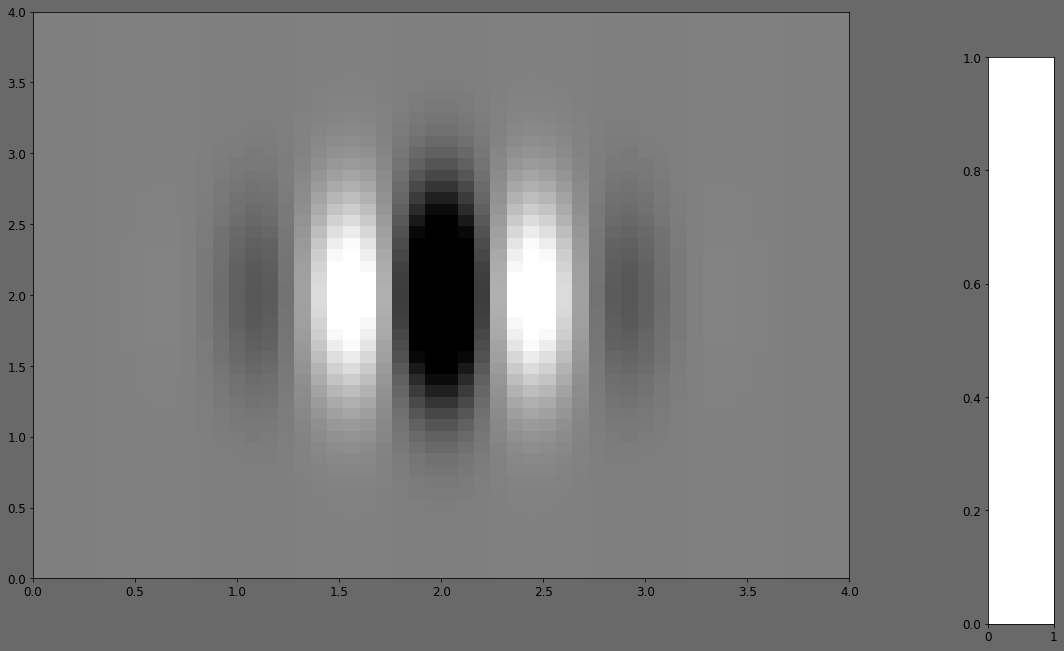

In [11]:
x, y = np.meshgrid(np.linspace(0, 4), np.linspace(0, 4))
z = gabor(x, y, x0=2 ,y0=2)
ge.twoD_plot(x.flatten(), y.flatten(), z.flatten()+0.5, vmin=0, vmax=1, colormap=ge.binary)
